


<p align ="left"><font size="5">Extracting Feature Descriptors from the Image Dataset</font></p>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def feature_descriptors(original_image, descriptor_image, fm1, fm2):

  gray = cv2.cvtColor(descriptor_image, cv2.COLOR_BGR2GRAY)
  gray = np.float32(gray)


  fig = plt.figure(figsize = (20,10.7))
  fig.add_subplot(2,3, 1)
  plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
  plt.axis('on')
  plt.title("Original Image")


 #Harris Corner Detection
  dst = cv2.cornerHarris(gray, 2,3,0.04) #(image, blocksize, kernal size, k)
  dst = cv2.dilate(dst, None) #result is dilated for marking the corners, not important
  descriptor_image[dst>0.02*dst.max()]=[0,0,255]
  fig.add_subplot(2,3, 2)
  plt.imshow(cv2.cvtColor(descriptor_image, cv2.COLOR_BGR2RGB))
  plt.axis('on')
  plt.title("Harris Corner Detector")





  #scale Invariant Feature
  sift = cv2.SIFT_create()
  kp = sift.detect(descriptor_image,None)
  img=cv2.drawKeypoints(descriptor_image,kp, descriptor_image)
  fig.add_subplot(2,3, 3)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('on')
  plt.title("Scale Invariant Feature (SIFT")



  # # Binary Robust Independent Elementary Features (BRIEF)
  # star = cv2.xfeatures2d.StarDetector_create()
  # brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
  # kp = star.detect(descriptor_image,None)
  # kp, des = brief.compute(descriptor_image, kp)
  # Brief_img= cv2.drawKeypoints(descriptor_image, kp, None, color=(0, 255, 0), flags=0)

  # fig.add_subplot(2,3, 4)
  # plt.imshow(cv2.cvtColor(Brief_img, cv2.COLOR_BGR2RGB))
  # plt.axis('on')
  # plt.title("Binary Robust Independent Elementary Features (BRIEF)")
  # plt.tight_layout()
  # plt.show()

  orb = cv2.ORB_create(nfeatures=50)
  kp1, des1 = orb.detectAndCompute(fm1, None)
  kp2, des2 = orb.detectAndCompute(fm2, None)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = bf.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  match_img = cv2.drawMatches(fm1, kp1, fm2, kp2, matches[:50], None)
  plt.figure(figsize=(15,15))
  plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
  plt.axis('on')
  plt.title("Feature Matching")



Extracting Feature Descriptors


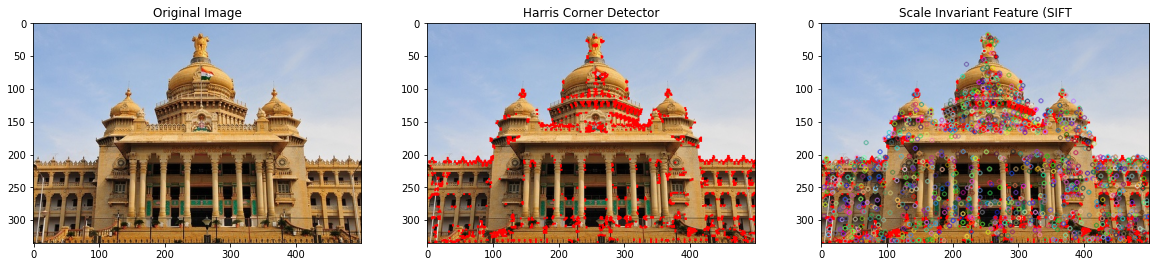

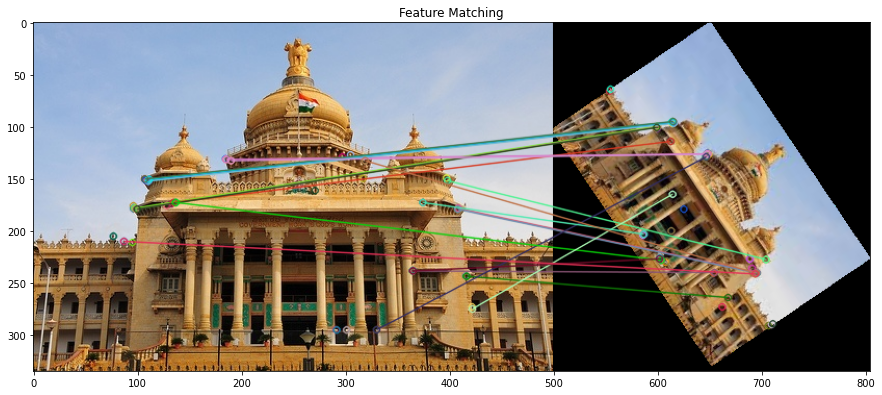

In [ ]:
def main():
  print("Extracting Feature Descriptors")
  original_image  = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Vidhana Soudha.jpg")
  corner_detcd_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Vidhana Soudha.jpg")
  image2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/rotated soudha.png")

  feature_descriptors(original_image,corner_detcd_image, original_image, image2)
main()